### Colas
La clase `Queue` del módulo de `multiprocessing` facilita la implementación de una cola FIFO para procesos como para subprocesos. Cualquier objetos de Python se puede pasar a través de un objeto queue. Con las colas es posible pasar mensajes de un lado a otro entre procesos.
Es común usar una cola de mensajes para la comunicación entre procesos en lugar de tener recursos compartidos, ya que, si ciertos procesos manejan mal la memoria y los recursos compartidos, corrompiendo algno de estos mientras se comparten los recursos, habrá numerosas consecuencias indeseables e impredecibles. Sin embargo, si un proceso no pudo manejar su mensaje correctamente, otros elementos en la cola permanecerán intactos.

El siguiente diagrama representa las diferencias en la arquitectura entre el uso de una cola de mensajes y los recursos compartidos (específicamente la memoria) para el interproceso.

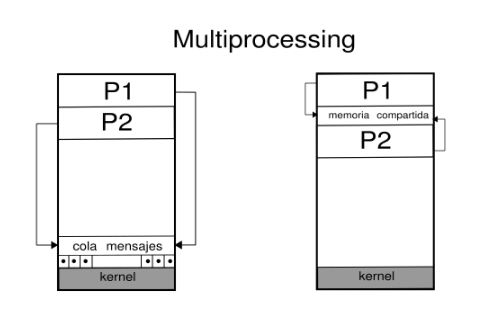

In [1]:
from IPython.display import Image
Image("img/queue-multiprocessing.png", width=380, height=420)

Veamos un ejemplo sencillo de la creación de una cola por medio de `Queue`:

In [ ]:
from multiprocessing import Process, Queue

def f(q):
    q.put([42, None, 'hello'])

if __name__ == '__main__':
    q = Queue()
    p = Process(target=f, args=(q,))
    p.start()
    print(q.get())    # prints "[42, None, 'hello']"
    p.join()

In [ ]:
import multiprocessing

def calc_cuad(numeros, q):
    for n in numeros:
        q.put(n * n)

if __name__ == '__main__':

    nums = range(10)
    q = multiprocessing.Queue()
    p = multiprocessing.Process(target=calc_cuad, args=(nums,q))
    
    p.start()
    p.join()
    
    while q.empty() is False:
        print(q.get())

In [ ]:
import multiprocessing

class MyWorker():
    def __init__(self, x):
        self.x = x

    def process(self):
        pname = multiprocessing.current_process().name
        print('Starting process %s for number %i...' % (pname, self.x))

        
def work(q):
    worker = q.get()
    worker.process()

if __name__ == '__main__':
    my_queue = multiprocessing.Queue()

    p = multiprocessing.Process(target=work, args=(my_queue,))
    p.start()

    my_queue.put(MyWorker(1))

    my_queue.close()
    my_queue.join_thread()   ## investigar ...
    p.join()

    print('Done.')